## <center> Outlier Detection and Treatment</center>

&nbsp;&nbsp;&nbsp; Outlier Detection and Treatment One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.

&nbsp;&nbsp;&nbsp; Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

In order to detection, I propose to use boxplot as a vitualize. And treatment of the outlier, I used the interquartile range (IQR). IQR is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [ ]:
df = pd.read_csv(r'D:\winequality.csv')
df.shape

(6497, 13)

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

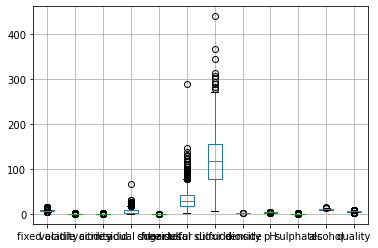

In [ ]:
df.boxplot()

### Using boxplot to show the outlier data

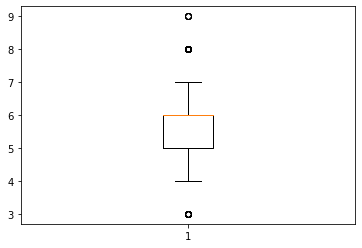

In [ ]:
plt.boxplot(df['quality'])
plt.show()

<AxesSubplot:xlabel='quality'>

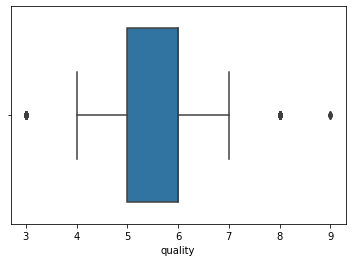

In [ ]:
ax = sns.boxplot(x=df["quality"])
ax

#### Steps to perform Outlier Treatment by using Interquartile Range (IQR) Score
This technique uses the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 * IQR) and (Q3 + 1.5 * IQR) is an outlier, and can be removed. Below are the steps to treat outlier:
1. Arrange your data in ascending order
2. Calculate Q1 ( the first Quarter)
3. Calculate Q3 ( the third Quartile)
4. Find IQR = (Q3 - Q1)
5. Find the lower Range = Q1 -(1.5 * IQR)
6. Find the upper Range = Q3 + (1.5 * IQR)

In [ ]:
# sorting value
df.sort_values(by=['quality'], ascending=True)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
740,white,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.60,3
2373,white,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.40,3
1931,white,7.1,0.49,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.00,3
2050,white,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.99970,2.93,0.55,9.70,3
6403,red,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,white,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.40,9
1605,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.90,9
820,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.40,9
876,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.70,9


In [ ]:
Q1, Q3 = np.percentile(df.quality,[25,75])
Q1,Q3

(5.0, 6.0)

In [ ]:
IQR = Q3 - Q1
IQR

1.0

In [ ]:
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
lower_range, upper_range

(3.5, 7.5)

In [ ]:
df[df.quality < lower_range]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
251,white,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.80,3
253,white,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.70,3
294,white,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.50,3
445,white,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.50,3
740,white,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.60,3
873,white,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.60,3
1034,white,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.10,3
1229,white,8.3,0.330,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.40,3
1417,white,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.00,3
1484,white,7.5,0.320,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.10,3


In [ ]:
df[df.quality > upper_range]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,white,NaN,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,white,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,white,6.8,0.26,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,white,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,white,6.7,0.23,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6100,red,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
6167,red,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8
6301,red,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
6347,red,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8


### Remove outliers

In [ ]:
df_out = df[(df.quality > lower_range) & (df.quality < upper_range)]
df_out.shape

(6269, 13)

<AxesSubplot:xlabel='quality'>

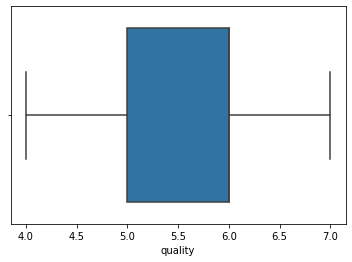

In [ ]:
ax = sns.boxplot(x=df_out["quality"])
ax